## Data Scientist Salary Prediction

In [89]:
## import libraries
import numpy as np
import pandas as pd

In [90]:
df=pd.read_csv("DataScientist.csv")

### Exploring Dataset

In [91]:
df.shape

(3909, 17)

In [92]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

In [93]:
df.dtypes

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [94]:
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [96]:
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3909.0,1954.000000,1128.575429,0.0,977.0,1954.0,2931.0,3908.0
index,3909.0,2167.446662,1247.657849,0.0,1121.0,2161.0,3249.0,4379.0
Rating,3909.0,3.283576,1.575749,-1.0,3.2,3.7,4.1,5.0
Founded,3909.0,1479.154771,855.750138,-1.0,1625.0,1976.0,2002.0,2020.0


### Exploratory Data Analysis & Data Cleaning
##### 1.Plotting bargraphs and countplots for numerical and categorical features respectively.
##### 2.Removing unwanted columns
##### 3.Handling NaN/missing values
##### 4.Removing unwanted alphabet/special characters from the features

In [98]:
## removing unwanted columns
print("Shape before removing: {}".format(df.shape))
df.drop(labels=['Unnamed: 0'], axis='columns', inplace=True)
print("Shape after removing: {}".format(df.shape))

Shape before removing: (3909, 17)
Shape after removing: (3909, 16)


In [99]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

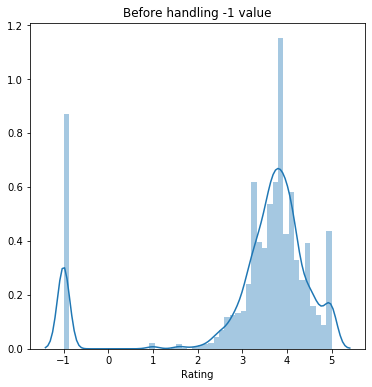

In [100]:
# visualizing rating column
plt.figure(figsize=(6,6))
sns.distplot(a=df['Rating'])
plt.title('Before handling -1 value')
plt.show()

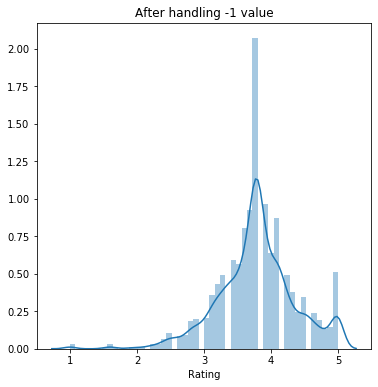

In [101]:
# Handling -1 values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
sns.distplot(a=df['Rating'])
plt.title('After handling -1 value')
plt.show()

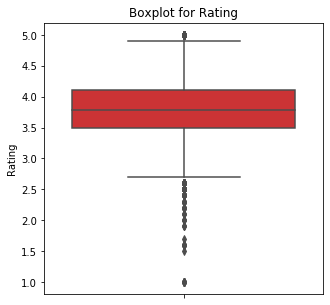

In [102]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df, orient='v', palette='Set1')
plt.title('Boxplot for Rating')
plt.ylabel('Rating')
plt.show()

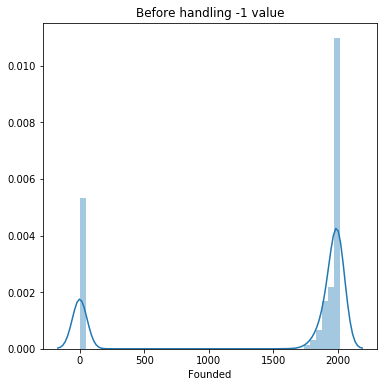

In [103]:
# visualizing founded column
plt.figure(figsize=(6,6))
sns.distplot(a=df['Founded'])
plt.title('Before handling -1 value')
plt.show()

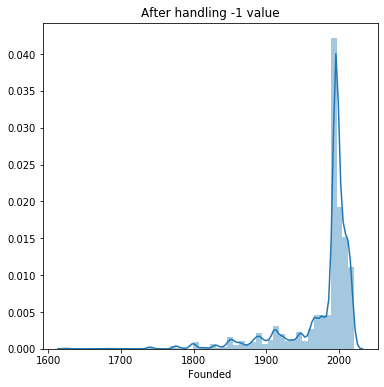

In [104]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(df['Founded'].median())
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
sns.distplot(a=df['Founded'])
plt.title('After handling -1 value')
plt.show()

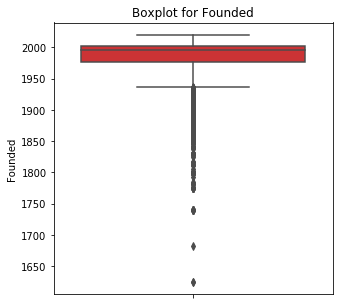

In [105]:
# Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
plt.title('Boxplot for Founded')
plt.ylabel('Founded')
plt.show()

In [106]:
# Cleaning Job Title column
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                                   274
Data Engineer                                                    260
Data Analyst                                                     246
Senior Data Scientist                                             91
Senior Data Analyst                                               47
Machine Learning Engineer                                         47
Big Data Engineer                                                 41
Business Intelligence Analyst                                     39
Senior Data Engineer                                              37
Sr. Data Scientist                                                23
Lead Data Scientist                                               23
Research Scientist                                                22
Data Modeler                                                      17
Junior Data Analyst                                               15
Principal Data Scientist          

In [107]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

data scientist    1757
data analyst       745
data engineer      739
other              449
mle                112
manager             80
director            27
Name: job_title, dtype: int64

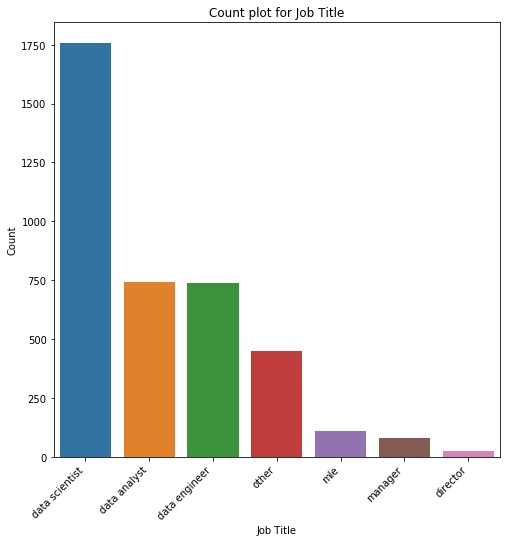

In [108]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
plt.title('Count plot for Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [109]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

other    3033
sr        832
jr         44
Name: job_seniority, dtype: int64

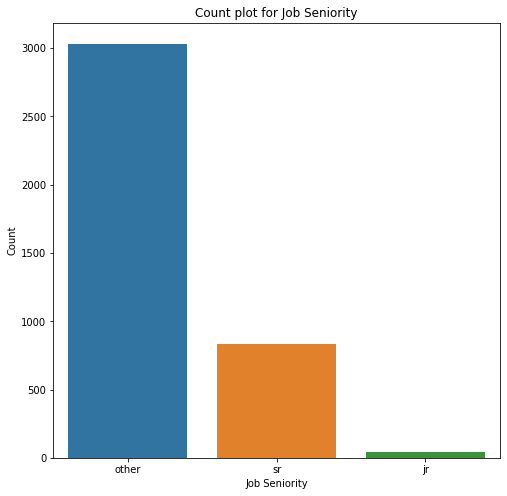

In [110]:
plt.figure(figsize=(8,8))
sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
plt.title('Count plot for Job Seniority')
plt.xlabel('Job Seniority')
plt.ylabel('Count')
plt.show()

In [111]:
# Removing Job Title column
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [112]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary


0       $111K-$181K 
1       $111K-$181K 
2       $111K-$181K 
3       $111K-$181K 
4       $111K-$181K 
            ...     
3904     $55K-$112K 
3905     $55K-$112K 
3906     $55K-$112K 
3907     $55K-$112K 
3908     $55K-$112K 
Name: Salary Estimate, Length: 3909, dtype: object

In [113]:
salary.value_counts()

$93K-$151K          62
$113K-$180K         61
$71K-$122K          60
$111K-$175K         60
$119K-$147K         44
                    ..
$39K-$71K            7
$99K-$173K           6
$146K-$175K          3
$10-$26 Per Hour     3
$41K-$74K            1
Name: Salary Estimate, Length: 148, dtype: int64

In [114]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $111K-$181K 
1       $111K-$181K 
2       $111K-$181K 
3       $111K-$181K 
4       $111K-$181K 
            ...     
3904     $55K-$112K 
3905     $55K-$112K 
3906     $55K-$112K 
3907     $55K-$112K 
3908     $55K-$112K 
Name: Salary Estimate, Length: 3909, dtype: object

In [115]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       111-181 
1       111-181 
2       111-181 
3       111-181 
4       111-181 
          ...   
3904     55-112 
3905     55-112 
3906     55-112 
3907     55-112 
3908     55-112 
Name: Salary Estimate, Length: 3909, dtype: object

In [116]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]


Length of Salary:  148


array([], dtype=object)

In [117]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]


array([], dtype=object)

In [118]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array([], dtype=object)

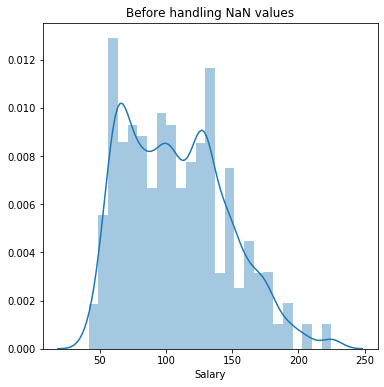

In [119]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')


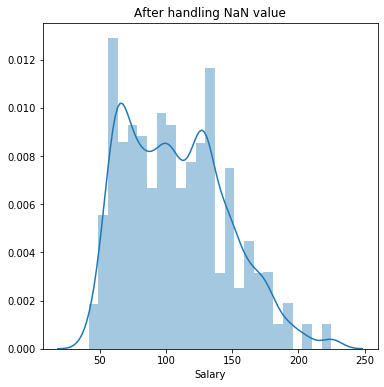

In [120]:
#Handling NaN values
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
plt.figure(figsize=(6,6))
sns.distplot(a=df['Salary'])
plt.title('After handling NaN value')
plt.show()

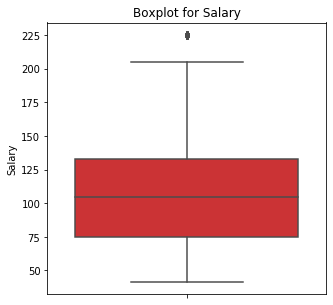

In [121]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [122]:
# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

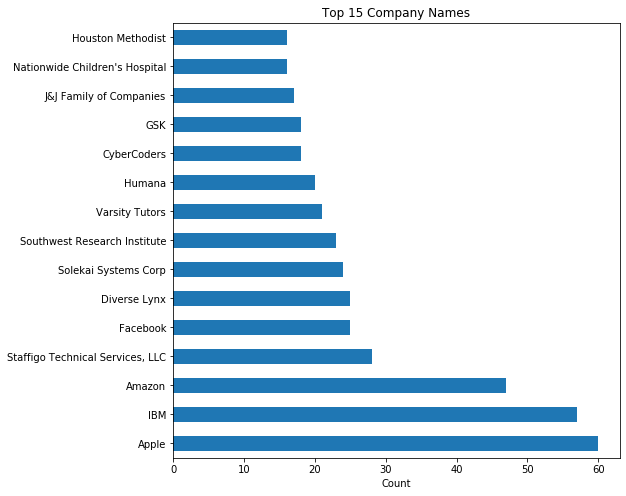

In [123]:
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Company Names')
plt.xlabel('Count')
plt.show()

In [124]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 11


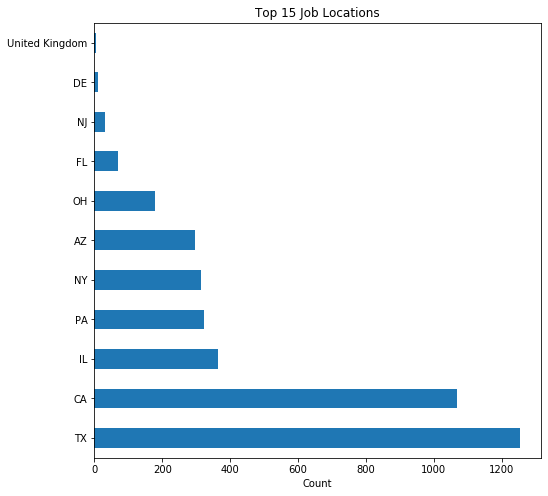

In [125]:
plt.figure(figsize=(8,8))
g = df["job_location"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Job Locations')
plt.xlabel('Count')
plt.show()

In [126]:
df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [127]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

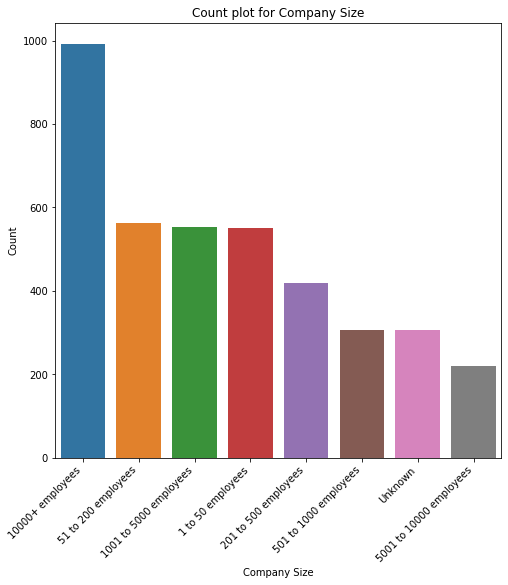

In [128]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [129]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()


Company - Private                 1933
Company - Public                  1114
-1                                 229
Nonprofit Organization             207
Subsidiary or Business Segment     160
Government                          91
College / University                77
Unknown                             38
Contract                            17
Hospital                            16
Private Practice / Firm             12
School / School District             5
Other Organization                   5
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [130]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

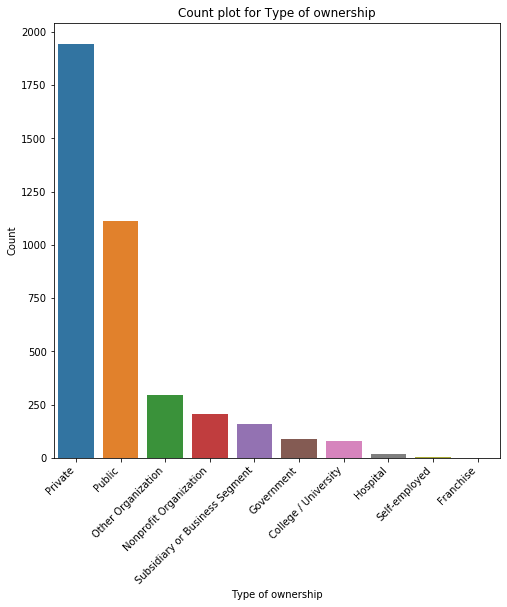

In [131]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [132]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

-1                                    546
IT Services                           472
Staffing & Outsourcing                313
Biotech & Pharmaceuticals             293
Computer Hardware & Software          264
                                     ... 
Metals Brokers                          1
Home Furniture & Housewares Stores      1
Religious Organizations                 1
Auto Repair & Maintenance               1
Museums, Zoos & Amusement Parks         1
Name: Industry, Length: 96, dtype: int64

In [133]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

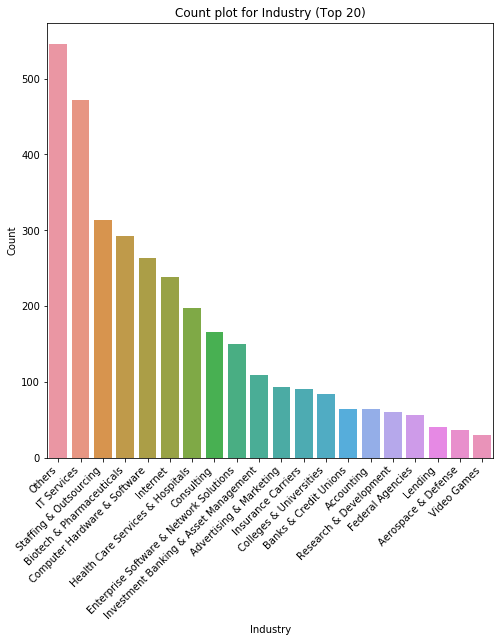

In [134]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [135]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Information Technology                1124
Business Services                      679
-1                                     546
Biotech & Pharmaceuticals              293
Finance                                270
Health Care                            197
Insurance                              109
Education                              101
Manufacturing                           87
Government                              82
Media                                   75
Retail                                  72
Accounting & Legal                      71
Aerospace & Defense                     37
Oil, Gas, Energy & Utilities            34
Telecommunications                      21
Consumer Services                       20
Non-Profit                              18
Transportation & Logistics              16
Construction, Repair & Maintenance      16
Real Estate                             12
Arts, Entertainment & Recreation        10
Restaurants, Bars & Food Services        9
Agriculture

In [136]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

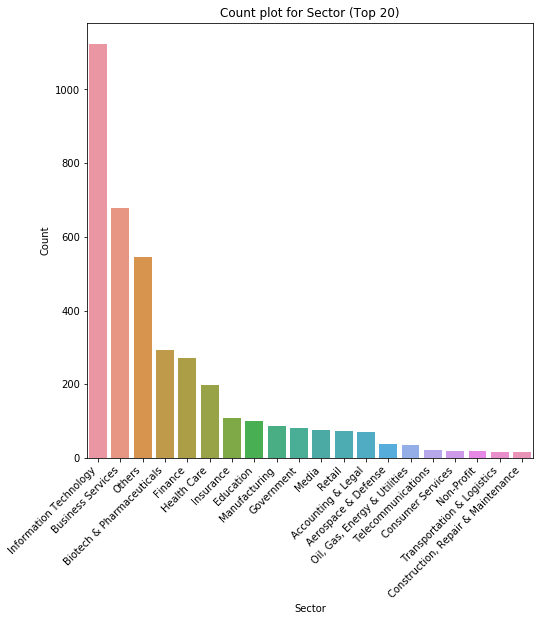

In [137]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [138]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()


Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
-1                                   229
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

In [139]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

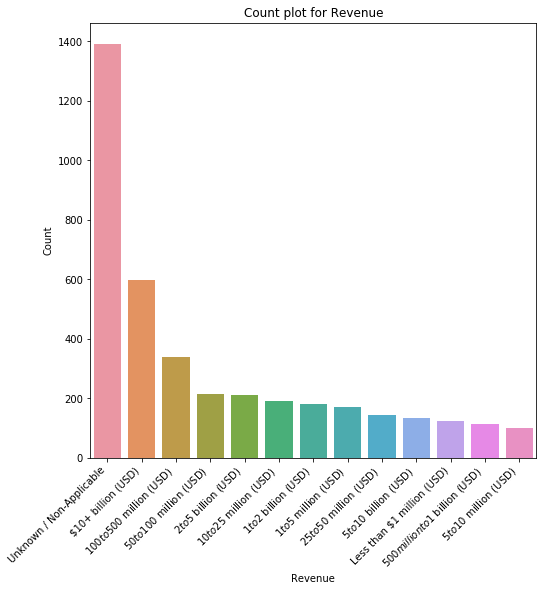

In [140]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [141]:
# Cleaning 'Competitors' column
df['Competitors']

0                             -1
1                             -1
2                             -1
3           Zocdoc, Healthgrades
4       BBDO, Grey Group, Droga5
                  ...           
3904                          -1
3905                          -1
3906                          -1
3907                          -1
3908                      AbbVie
Name: Competitors, Length: 3909, dtype: object

In [142]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

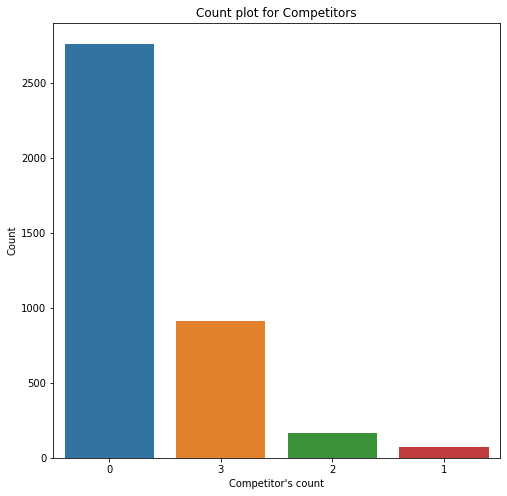

In [143]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [144]:
# Dataset till now
df.tail()

,index,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,job_title,job_seniority,Salary,job_location
3904,4375,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Private,IT Services,Information Technology,$10 to $25 million (USD),0,-1,data engineer,other,83.5,OH
3905,4376,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Private,IT Services,Information Technology,$50 to $100 million (USD),0,-1,data analyst,jr,83.5,OH
3906,4377,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),0,-1,data engineer,other,83.5,OH
3907,4378,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies,"Dublin, OH","Omaha, NE",1 to 50 employees,1995,Private,Accounting,Accounting & Legal,Less than $1 million (USD),0,-1,data engineer,other,83.5,OH
3908,4379,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,1995,Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),1,-1,data scientist,other,83.5,OH


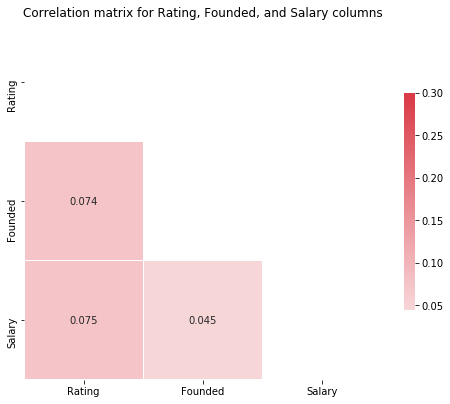

In [145]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')


Insight: Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

#### Feature Engineering
##### 1.Creating new features from existing features
##### 2.Trimming Columns
##### 3.Handling ordinal and nominal categorical features
##### 4.Feature Selection

#### Creating new features from existing features
##### 1.Adding column of _job_inheadquarters
##### 2.Adding columns of python, excel, sql, tableau jobs

In [146]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)


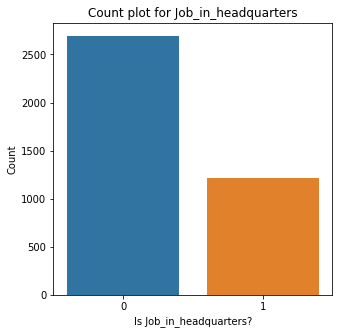

In [147]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [148]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [149]:

# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

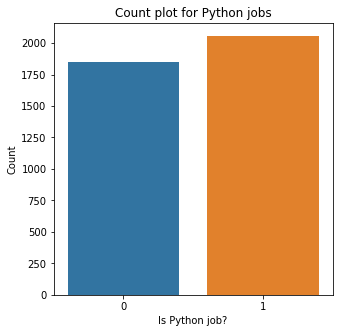

In [150]:

plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

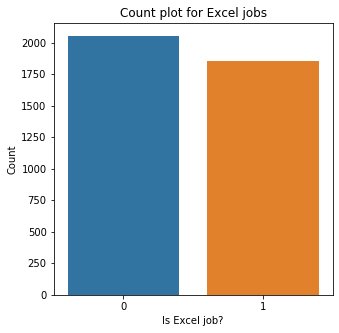

In [151]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

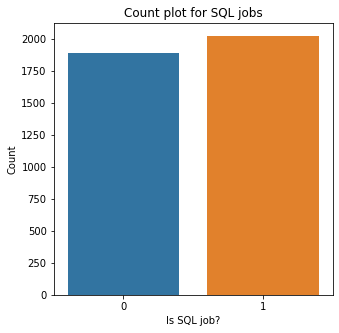

In [152]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

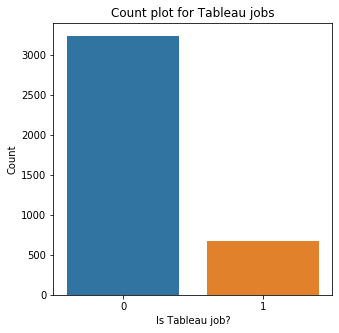

In [153]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [154]:

df.drop(labels=['Job Description'], axis=1, inplace=True)

• Trimming Columns
Features having more than 10 categories are trimmed so as to reduce the dimensionality.

In [155]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

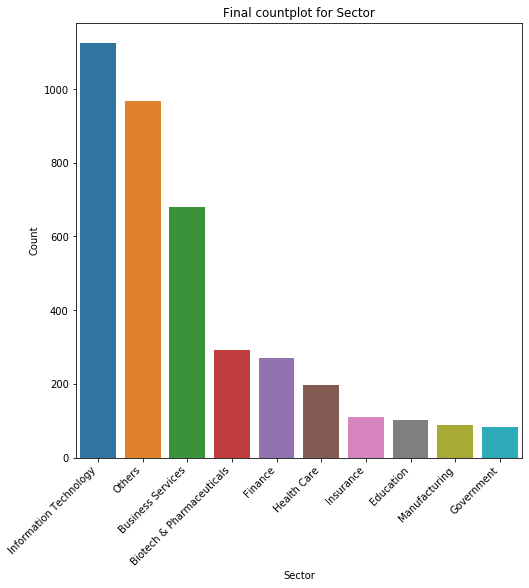

In [156]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [157]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)


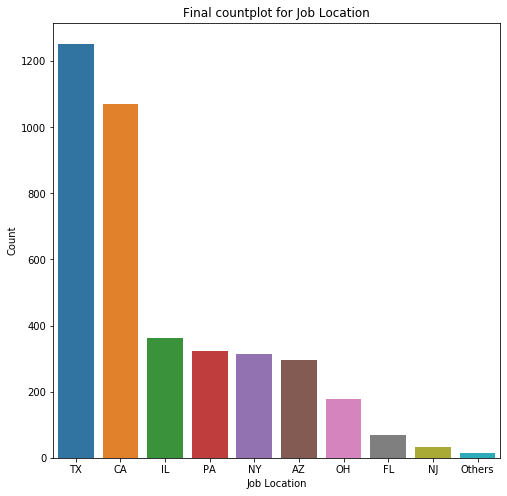

In [158]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [159]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [160]:
df.columns

Index(['index', 'Rating', 'Size', 'Founded', 'Type of ownership', 'Sector',
       'Revenue', 'Competitors', 'Easy Apply', 'job_title', 'job_seniority',
       'Salary', 'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [161]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)


• Handling ordinal categorical features
Ordinal features are categorical variables that have some order associated with them (e.g. size, rating, remark, etc.)

In [162]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [163]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [164]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

• Handling nominal categorical features-
Nominal features are categorical variables that have no numerical importance (e.g. occupation, name, etc.)

In [165]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (3909, 17)
After: (3909, 26)


In [166]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (3909, 26)
After: (3909, 35)


In [167]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (3909, 35)
After: (3909, 41)


In [168]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)


• Feature Selection
_Selecting features based on information gain (mutual_info_regression) and correlation matrix_

In [175]:
X = df.drop('salary', axis=1)
y = df['salary']

In [185]:
X=df.drop('Easy Apply',axis=1)

In [186]:
X

,index,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,...,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle
0,0,3.500000,4,2007,0,0,2,146.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,4.500000,5,2008,0,0,0,146.0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,2,3.784143,1,1995,0,0,0,146.0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,3,3.400000,3,2019,0,2,0,146.0,1,1,...,0,1,0,0,1,0,0,0,0,0
4,4,3.400000,2,2007,0,3,0,146.0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,4.400000,3,2011,4,0,0,83.5,0,0,...,0,1,0,0,0,1,0,0,0,0
3905,4376,5.000000,2,2008,6,0,1,83.5,0,0,...,0,1,0,0,1,0,0,0,0,0
3906,4377,3.800000,6,1977,7,0,0,83.5,0,1,...,0,0,0,0,0,1,0,0,0,0
3907,4378,4.000000,1,1995,1,0,0,83.5,0,1,...,0,0,0,0,0,1,0,0,0,0


In [187]:
y

0       146.0
1       146.0
2       146.0
3       146.0
4       146.0
        ...  
3904     83.5
3905     83.5
3906     83.5
3907     83.5
3908     83.5
Name: salary, Length: 3909, dtype: float64

In [188]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2

In [189]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000002355C7CB280>)

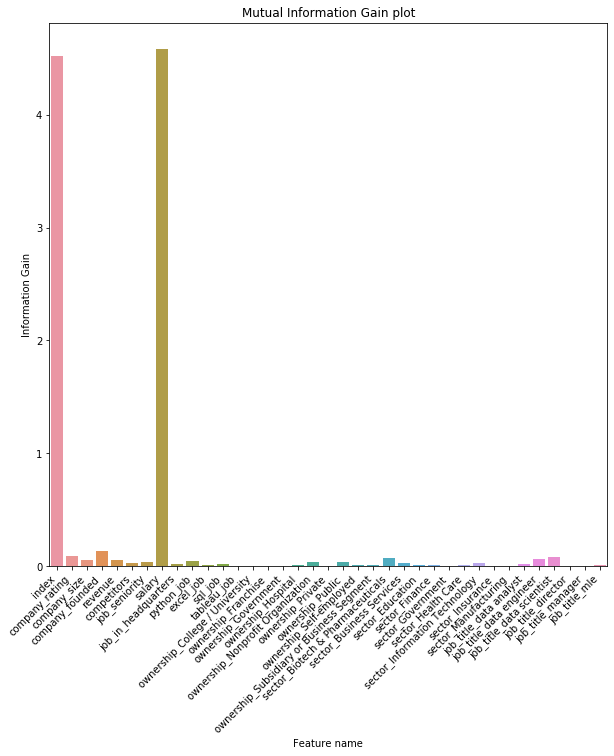

In [190]:

plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


Insight: From feature importance chart, it is evident that there are atleast 20 features that impact the target variable.

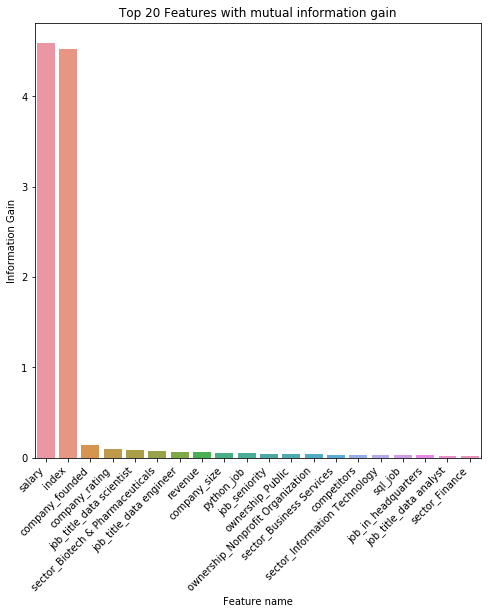

In [191]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

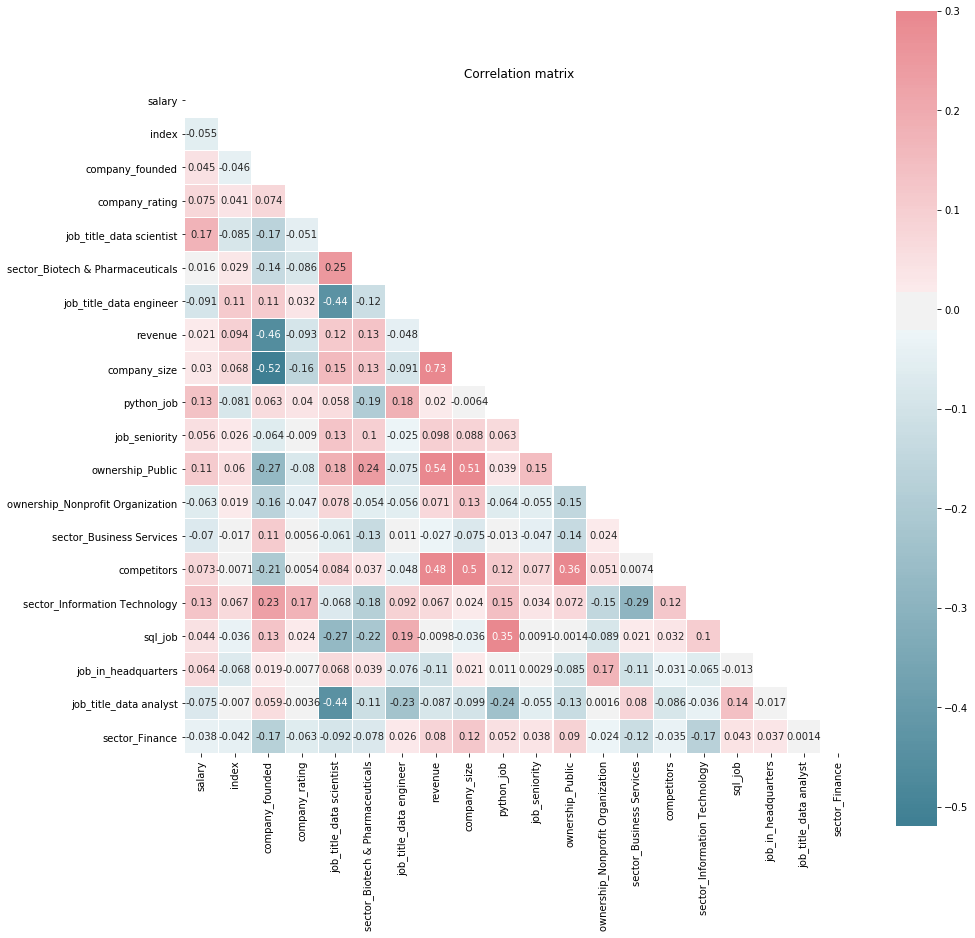

In [192]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')


Range of correlation are as follows:

1.Strong correlation: X > 0.7<br>
2.Moderate correlation: 0.5 < X < 0.7<br>
3.Weak correlation: X < 0.5<br>

Insight: From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [193]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)


E:\ml_and_dl\env\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


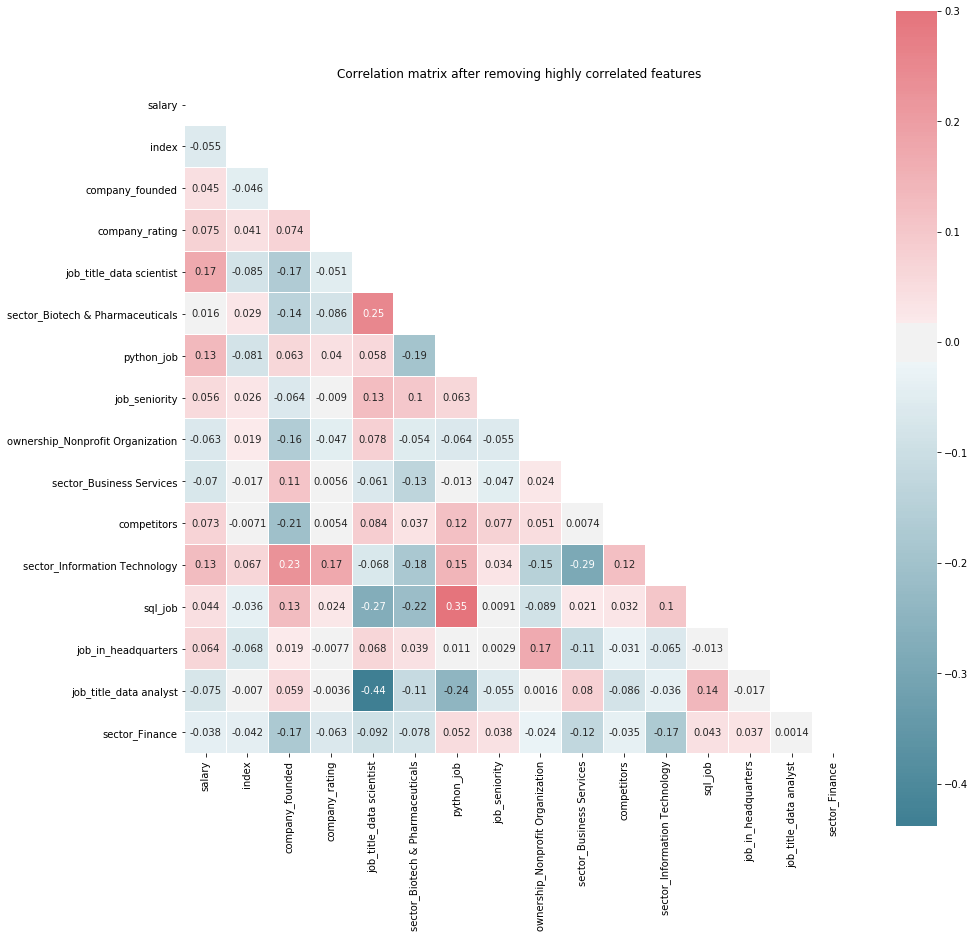

In [194]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [195]:
X.columns

Index(['salary', 'index', 'company_founded', 'company_rating',
       'job_title_data scientist', 'sector_Biotech & Pharmaceuticals',
       'python_job', 'job_seniority', 'ownership_Nonprofit Organization',
       'sector_Business Services', 'competitors',
       'sector_Information Technology', 'sql_job', 'job_in_headquarters',
       'job_title_data analyst', 'sector_Finance'],
      dtype='object')

In [198]:
# Rearranging the columns

X = X[['salary','index','company_rating', 'company_founded', 'competitors',
        'sector_Business Services', 'sector_Information Technology',
        'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'python_job',  'sql_job','ownership_Nonprofit Organization',
      'sector_Finance']]

Feature Scaling-
Scaling features using StandardScaler library

In [199]:
X.head()

,salary,index,company_rating,company_founded,competitors,sector_Business Services,sector_Information Technology,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,python_job,sql_job,ownership_Nonprofit Organization,sector_Finance
0,146.0,0,3.500000,2007,0,0,0,0,1,0,2,0,0,1,0,0
1,146.0,1,4.500000,2008,0,0,0,0,1,0,0,1,1,1,0,0
2,146.0,2,3.784143,1995,0,0,0,0,0,0,0,1,1,0,0,0
3,146.0,3,3.400000,2019,2,0,1,0,0,1,0,1,1,1,0,0
4,146.0,4,3.400000,2007,3,1,0,0,0,0,0,1,1,0,0,0


In [200]:
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

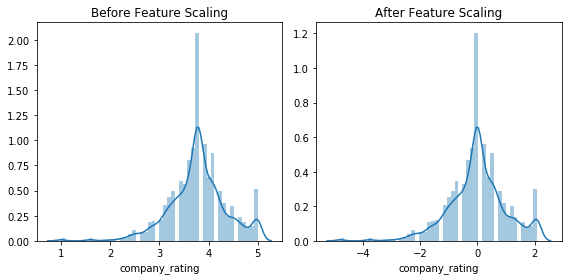

In [201]:

# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

Insight: Feature Scaling doesnot change the distribution of the data, it only reduces the scale of that particular feature.

In [202]:
X.head()

,salary,index,company_rating,company_founded,competitors,sector_Business Services,sector_Information Technology,sector_Biotech & Pharmaceuticals,job_title_data scientist,job_title_data analyst,job_seniority,job_in_headquarters,python_job,sql_job,ownership_Nonprofit Organization,sector_Finance
0,146.0,0,-0.488643,0.620534,0,0,0,0,1,0,2,0,0,1,0,0
1,146.0,1,1.231066,0.641952,0,0,0,0,1,0,0,1,1,1,0,0
2,146.0,2,0.000000,0.363521,0,0,0,0,0,0,0,1,1,0,0,0
3,146.0,3,-0.660614,0.877547,2,0,1,0,0,1,0,1,1,1,0,0
4,146.0,4,-0.660614,0.620534,3,1,0,0,0,0,0,1,1,0,0,0


### Model Building & Evaluation
Metric: Negative Root Mean Squared Error (NRMSE)<br>
Multiple Linear Regression: -27.523 NRMSE<br>
Lasso Regression (L1 Regularization): -27.993 NRMSE <br>
Random Forest (Ensemble): -17.637 NRMSE <br>
Gradient Boosting: -24.429 NRMSE <br>
Voting (Random Forest + Gradient Boosting): -19.136 NRMSE <br>

In [203]:
from sklearn.model_selection import cross_val_score

In [204]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))


--- Average NRMSE: -0.0 ---
Standard Deviation: 0.0


In [205]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -0.028 ---
Standard Deviation: 0.008


In [206]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -1.948 ---
Standard Deviation: 2.196


In [207]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -1.606 ---
Standard Deviation: 1.684


Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric. And fed to Voting algorithm to reduce the error!

In [208]:

# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -1.8 ---
Standard Deviation: 2.009


Note: Voting algorithm too did not perform well as compared to Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.

## Making Predictions

In [209]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [210]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)
  

  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)
  

  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [211]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 33460(USD) to 51460(USD) per annum.


In [212]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 33480(USD) to 51480(USD) per annum.
